In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
import missingno as msno

from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import xgboost as xgb
import lightgbm as lgb
from LinearRegress import LinearRegress
%matplotlib inline
# pd.set_option('max.columns', 100)
save_img = True # 是否将代码生成的图片保存
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [2]:
def f1(x):
    if x > 32:
        return 'very_fat'
    if x > 28:
        return 'fat'
    if x > 24:
        return 'heavy'
    if x > 18.5:
        return 'normal'
    return 'thin'
def f2(x):
    if x > 40:
        return 'old'
    if x > 20:
        return 'young'
    return 'teen'
def pre(df):
    df['bmit'] = df['bmi'].apply(f1)
    df['aget'] = df['age'].apply(f2)
    df = pd.get_dummies(df)
    return df

   age     sex     bmi  children smoker     region     charges
0   46    male  38.170         2     no  southeast  13991.2296
1   50    male  27.455         1     no  northeast  14903.6078
2   41    male  23.940         1     no  northeast  11314.7455
3   56  female  25.650         0     no  northwest  17043.5022
4   39  female  41.800         0     no  southeast  10923.7187
age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            uint8
sex_male              uint8
smoker_no             uint8
smoker_yes            uint8
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
bmit_fat              uint8
bmit_heavy            uint8
bmit_normal           uint8
bmit_thin             uint8
bmit_very_fat         uint8
aget_old              uint8
aget_teen             uint8
aget_young            uint8
dtype: object


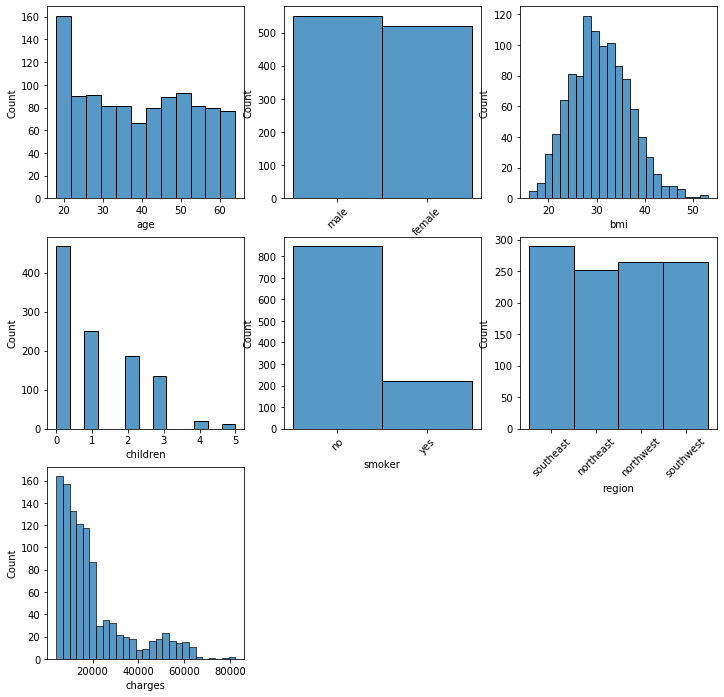

In [3]:
train_raw = pd.read_csv('train.csv')
# 读入数据
plt.figure(figsize=(12, 12))
for i, c in enumerate(train_raw.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(train_raw[c], palette=sns.color_palette("Blues_r")[0:5])
    if train_raw[c].dtype == object:
        plt.xticks(rotation=45)
if save_img:
    plt.savefig('img/2_3.png', bbox_inches='tight')
print(train_raw.head())
train_raw = pre(train_raw)
# 二分类属性的0-1转换
# train_raw = pd.get_dummies(train_raw)
# print(train_raw['region'].unique())
print(train_raw.dtypes)

In [4]:
train_raw.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,bmit_fat,bmit_heavy,bmit_normal,bmit_thin,bmit_very_fat,aget_old,aget_teen,aget_young
0,46,38.170,2,13991.2296,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0
1,50,27.455,1,14903.6078,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0
2,41,23.940,1,11314.7455,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0
3,56,25.650,0,17043.5022,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
4,39,41.800,0,10923.7187,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1


               age          bmi     children       charges   sex_female  \
count  1070.000000  1070.000000  1070.000000   1070.000000  1070.000000   
mean     39.111215    30.797131     1.083178  19661.048794     0.485047   
std      14.187366     6.089855     1.202429  15123.441966     0.500010   
min      18.000000    15.960000     0.000000   4186.092800     0.000000   
25%      26.000000    26.400000     0.000000   8926.060950     0.000000   
50%      39.000000    30.497500     1.000000  14716.574550     0.000000   
75%      51.000000    34.800000     2.000000  23885.154900     1.000000   
max      64.000000    53.130000     5.000000  82225.434500     1.000000   

          sex_male    smoker_no   smoker_yes  region_northeast  \
count  1070.000000  1070.000000  1070.000000       1070.000000   
mean      0.514953     0.793458     0.206542          0.234579   
std       0.500010     0.405013     0.405013          0.423934   
min       0.000000     0.000000     0.000000          0.0000

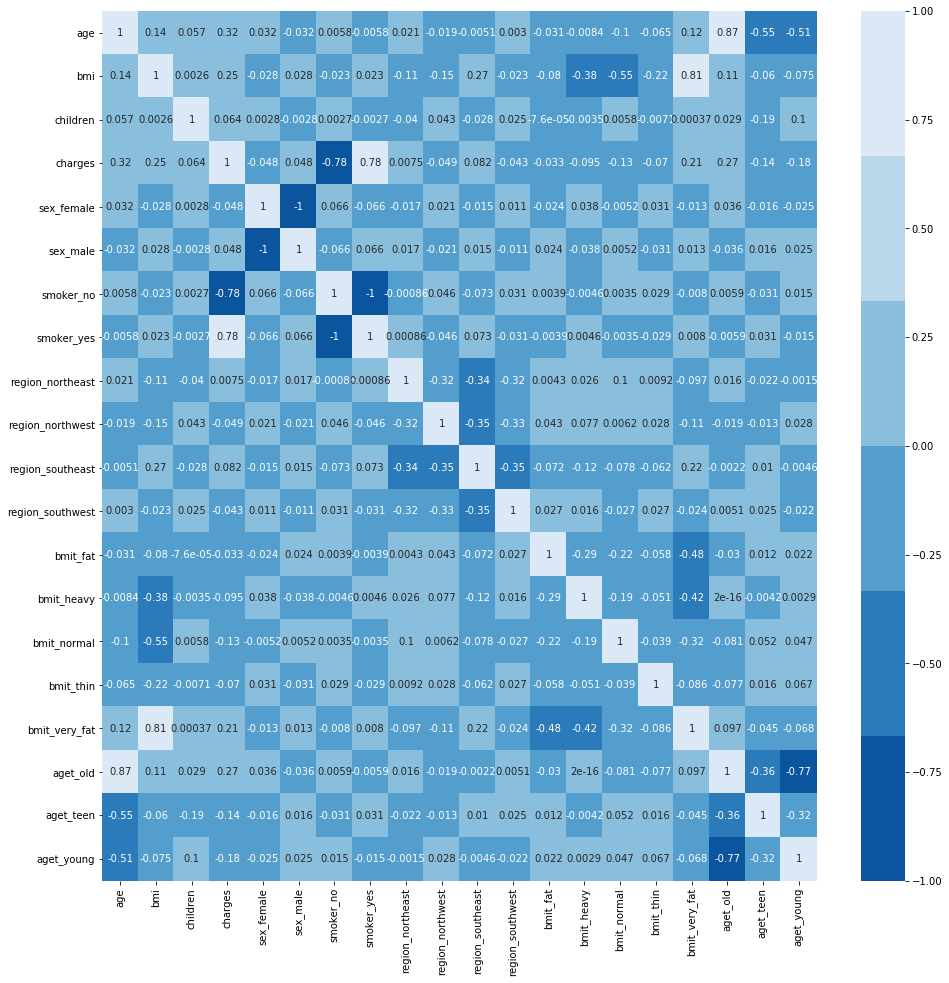

In [5]:
plt.figure(figsize=(16, 16))
print(train_raw.describe())
sns.heatmap((train_raw).corr(), annot=True, cmap=sns.color_palette("Blues_r"))
if save_img:
    plt.savefig('img/2_1.png', bbox_inches='tight')

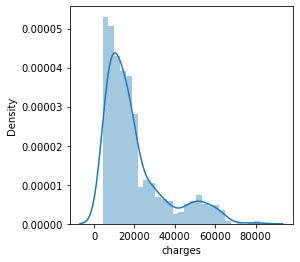

In [6]:
plt.figure(figsize=(4, 4))
sns.distplot(train_raw['charges'])
if save_img:
    plt.savefig('img/2_2.png', bbox_inches='tight')

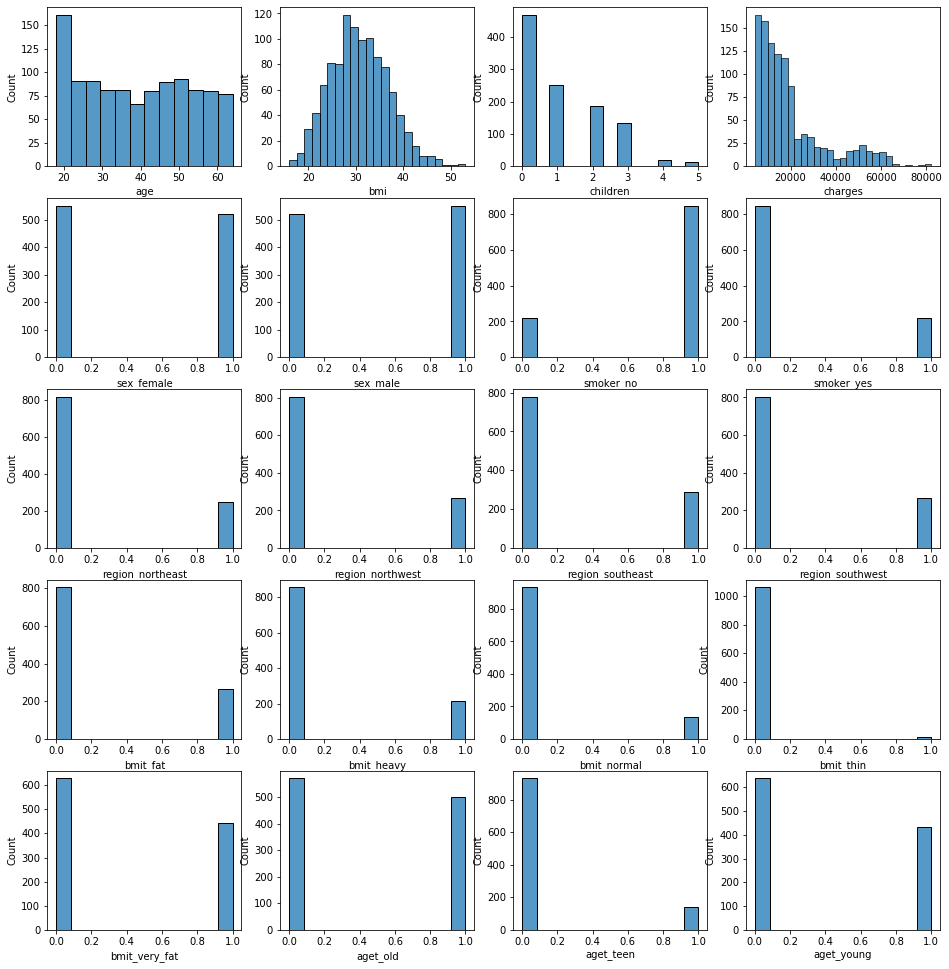

In [7]:
#train_raw['charges'] = np.log(1. + train_raw['charges'])
plt.figure(figsize=(16, 24))
for (i, c) in enumerate(train_raw.columns):
    plt.subplot(7, 4, i + 1)
    sns.histplot(train_raw[c])
plt.savefig('img/2_4.png', bbox_inches='tight')
#print(train_raw.describe())

In [8]:
y = train_raw['charges'].values.reshape(train_raw.shape[0], 1)

train_raw = train_raw.drop(columns=['charges'])
X = train_raw.values
zoomr = 10000
linear = LinearRegress(X/ zoomr, y/ zoomr)
linear.train(6400)

process: 0.000000, loss: 884.558903
process: 0.200000, loss: 28.175533
process: 0.400000, loss: 28.172996
process: 0.600000, loss: 28.172748
process: 0.800000, loss: 28.172500
process: 1.000000, loss: 28.172252


In [9]:
t = linear.w * X.mean(axis=0).reshape(X.shape[1], 1) / zoomr
dd = dict()
for i, c in enumerate(train_raw.columns):
    dd[c] = t[i][0]
print(dd)
print(linear.w * X.mean(axis=0).reshape(X.shape[1], 1)) 
test_raw = pd.read_csv('test_sample.csv')
ans = pd.read_csv('test_sample.csv')
test_raw = pre(test_raw)
test_raw = test_raw.drop(columns=['charges'])
x = test_raw.values
ans['charges'] = linear.predict(x) 
#ans['charges'] = np.exp(linear.predict(x)) - 1.
XE = np.column_stack((X, np.ones(X.shape[0])))
XT = np.column_stack((x, np.ones(x.shape[0])))
w = np.linalg.pinv(XE).dot(y)
ans['charges'] = XT.dot(w)
ans.to_csv('submission.csv', index=False)
if True:
    ans['charges'] = np.zeros((x.shape[0], 1))
    divide_data = KFold(n_splits=5).split(X)
    vsc = 0
    for tidx, vidx in divide_data:
        Xt = X[tidx]
        Xv = X[vidx]
        rfr=RandomForestRegressor()
        rfr.fit(Xt,y[tidx])   #训练数据    
        ans['charges'] = ans['charges'] + rfr.predict(x)
        vsc += rfr.score(Xv, y[vidx])
    print('[RF]acc_score:', vsc / 5)
    ans['charges'] = ans['charges'] / 5
    ans.to_csv('submission.csv', index=False)
    print('okay')

{'age': 5.699650848340155, 'bmi': 22.774826174759095, 'children': 0.19801997429970755, 'sex_female': 0.4959315127646767, 'sex_male': 0.07681450421722769, 'smoker_no': 0.3944932077144667, 'smoker_yes': 0.07150233415283809, 'region_northeast': 0.0652595683560437, 'region_northwest': 0.0007846660205889417, 'region_southeast': 0.26095625017769464, 'region_southwest': 0.17015877467577104, 'bmit_fat': 0.1559425614194058, 'bmit_heavy': 0.05509975912717385, 'bmit_normal': 0.04504084220128536, 'bmit_thin': 0.001540432035243261, 'bmit_very_fat': 0.4250796701211063, 'aget_old': 0.17790398084737497, 'aget_teen': 0.01525980426688446, 'aget_young': 0.1444561257240935}
[[5.69965085e+04]
 [2.27748262e+05]
 [1.98019974e+03]
 [4.95931513e+03]
 [7.68145042e+02]
 [3.94493208e+03]
 [7.15023342e+02]
 [6.52595684e+02]
 [7.84666021e+00]
 [2.60956250e+03]
 [1.70158775e+03]
 [1.55942561e+03]
 [5.50997591e+02]
 [4.50408422e+02]
 [1.54043204e+01]
 [4.25079670e+03]
 [1.77903981e+03]
 [1.52598043e+02]
 [1.44456126e

In [10]:
if False:
    model =  xgb.XGBRegressor(eta=0.01)
    model.fit(X=train_raw, y=y.flatten())
    xgb.plot_importance(model)
    param_grid = [
    {'n_estimators': [300, 400, 500], 
     'max_features': [2, 4, 6, 8], 
     'min_child_weight': [i + 1 for i in range(10)],
     'gamma': [i / 100 for i in range(11)],
     'reg_alpha': np.linspace(0, 10, 11),
     'reg_lambda': np.linspace(40, 60, 11),
     'subsample': [0.8, 0.9, 1.],
     'silent': [1],
     'kfold': [5]
     },
    ]
     
    grid_search = GridSearchCV(xgb.XGBRegressor(eta=0.01), param_grid, cv=5,
                              scoring='neg_mean_squared_error', verbose=False)
    grid_search.fit(X=train_raw, y=y.flatten())
    
    print(np.mean(np.square(grid_search.predict(train_raw) - y)))
    ypred = grid_search.predict(test_raw)
    ans['charges'] = ypred
    print(ans['charges'].mean())
    ans.to_csv('submission.csv', index=False)
    
    print('okay')